In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
csv_files = []
for dirname, _, filenames in os.walk(r"C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE"):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
C:/Users/M BALAJI/web attack/MachineLearningCSV/MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv


In [2]:
# pd.read_csv(csv_files[0])

In [3]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after droping null values, the length of df:", len(df))
# df_experiment = df.loc[df.Label.str.contains(pat='DoS|BENIGN',na=False)]
# df_experiment = df_experiment.loc[~(df_experiment.Label =="DoS Slowhttptest") ]

# del df


original length of df: 2830743
after droping null values, the length of df: 2827876


In [4]:
df.Label.value_counts()
# del df

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [5]:
df_experiment = df.copy()
df_experiment.Label.replace("Web.*", "Web Attack", regex=True, inplace=True)
df_experiment.Label.replace(r'.*Patator$', "Brute Force", regex=True,inplace=True)
df_experiment.Label.replace(["DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"], "DoS", inplace=True)
df_experiment.Label.value_counts()

BENIGN          2271320
DoS              251712
PortScan         158804
DDoS             128025
Brute Force       13832
Web Attack         2180
Bot                1956
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64

In [6]:
df_experiment.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
# df_experiment.Label.value_counts()
del df

In [8]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df_experiment.Label
X = df_experiment.drop(columns='Label')
labels = y.unique()

classes = y.nunique()
print(X.shape)
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("after spliting the data:\n")
print("training data length:", len(X_train))
print("test data length:", len(X_test))
# print(y_train.nunique())
# print(y_train.value_counts())

(2827876, 78)
number of labels: 9
instances per label
 BENIGN          2271320
DoS              251712
PortScan         158804
DDoS             128025
Brute Force       13832
Web Attack         2180
Bot                1956
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64
labels: ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'Web Attack'
 'Brute Force' 'DoS' 'Heartbleed']
after spliting the data:

training data length: 2120907
test data length: 706969


In [9]:
### Set a copy for binary classification:
class_attack = ['PortScan', 'Web Attack', 'Brute Force', 'DDoS', 'Bot','Infiltration', 'DoS', 'Heartbleed']
bi_train_y = y_train.copy()
bi_train_y.replace(class_attack, value='attack', inplace=True)
print(bi_train_y.unique())
# bi_train.head(2)

bi_test_y = y_test.copy()
bi_test_y.replace(class_attack, value='attack', inplace=True)
print(bi_test_y.unique())
# bi_train.head(2)

### switch for binary!
y_train = bi_train_y
y_test = bi_test_y

['BENIGN' 'attack']
['BENIGN' 'attack']


In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


### training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=
                             {labels_dict['BENIGN']:200000})
# steps = [('u', under), ('o', over)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

instances per label in training set
 BENIGN    1703490
attack     417417
Name: Label, dtype: int64
instances per label in test set
 BENIGN    567830
attack    139139
Name: Label, dtype: int64
(2120907, 78)
(706969, 78)
{'BENIGN': 0, 'attack': 1}


ModuleNotFoundError: No module named 'imblearn'

In [12]:
X.shape

(2827876, 78)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [14]:
X.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,8.061534e+03,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,5.825628e+01,6.897811e+01,...,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8.324468e+06,5.043548e+05,8.704568e+06,7.928061e+06
std,1.827432e+04,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,1.861733e+02,2.813212e+02,...,6.367482e+02,1.085539e+06,6.489234e+05,3.935787e+05,1.026333e+06,5.773818e+05,2.364057e+07,4.605289e+06,2.437766e+07,2.337390e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.133800e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.239368e+06,5.000000e+00,4.000000e+00,1.880000e+02,4.840000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [15]:
# Autoencoder model to extract latent features

# from tensorflow.keras import Model, Sequential, Input
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(patience=3, mode='min')

# input_shape = X_train.shape[1]
# print(f"input shape: {input_shape}")
# encoding_dim = 10
# encoder = Sequential([
#     Dense(32, activation='relu', input_shape=(input_shape, )),
#     Dense(encoding_dim, activation='relu')
# ])
# decoder = Sequential([
#     Dense(32, activation='relu', input_shape=(encoding_dim,)),
#     Dense(input_shape)
# ])
# autoencoder = Sequential([encoder, decoder])
# autoencoder.compile(loss='mse', optimizer='Adam')
# history = autoencoder.fit(X_train, X_train, batch_size=64,
#                           epochs=20, validation_split=0.2)

In [16]:
# X_train_encode = encoder.predict(X_train)
# X_test_encode = encoder.predict(X_test)

In [17]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.utils import resample
# %matplotlib inline

# X_train_pca, y_train_pca = resample(
#     X_train, y_train, n_samples=30000, random_state=42, stratify=y_train)
# pca = PCA(n_components=2)
# projected = pca.fit_transform(X_train_pca)
# fig, ax = plt.subplots(figsize=(10,6))
# scat = ax.scatter(projected[:, 0], projected[:, 1],
#             c=y_train_pca, edgecolor='none', cmap="Paired", alpha=0.7)
# plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
# plt.axis('off')
# plt.title("PCA at latent space of CIC-IDS2017 training set")
# plt.show()

In [18]:
# X_test_pca, y_test_pca = resample(
#     X_test, y_test, n_samples=100000, random_state=42, stratify=y_test)
# pca = PCA(n_components=2)
# projected = pca.fit_transform(X_test_pca)
# fig, ax = plt.subplots(figsize=(10,6))
# scat = ax.scatter(projected[:, 0], projected[:, 1],
#             c=y_test_pca, edgecolor='none', cmap="Paired", alpha=0.7)
# plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
# plt.axis('off')
# plt.title("PCA at latent space of CIC-IDS2017 test set")
# plt.show()

## Feature selection:

### ANOVA f-value

In [19]:
### transform ndarray into dataframe type for later operation.
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)

# f_value = pd.Series(f_value)
# f_value.index = X_train.columns
# f_value.sort_values(ascending=False)

# ### plot the ordered f_value per feature
# f_value.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=10)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]

### transform ndarray back:
X_train = X_train.values
X_test = X_test.values

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Classification Model---LSTM 

In [20]:
### reshape input data to LSTM format [samples, time_steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", X_train_lstm.shape)
print(f"shape of X_test:", X_test_lstm.shape)

shape of X_train: (3406980, 1, 78)
shape of X_test: (706969, 1, 78)


In [21]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_classes = len(le.classes_)
print(f"num of classes:{n_classes}")
n_features = X_train_lstm.shape[2]
def multiClassModel(n_features, n_classes=9):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam')
    model.summary()
    return model

num of classes:2



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                13080     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
softmax (Dense)              (None, 2)                 62        
Total params: 13,142
Trainable params: 13,142
Non-trainable params: 0
_________________________________________________________________


2022-02-14 16:46:13.921005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
42588/42588 [==============================] - 111s 3ms/step - loss: 0.1104 - val_loss: 0.0807
Epoch 2/200
42588/42588 [==============================] - 108s 3ms/step - loss: 0.0711 - val_loss: 0.0633
Epoch 3/200
42588/42588 [==============================] - 115s 3ms/step - loss: 0.0622 - val_loss: 0.0798
Epoch 4/200
42588/42588 [==============================] - 117s 3ms/step - loss: 0.0584 - val_loss: 0.0461
Epoch 5/200
42588/42588 [==============================] - 115s 3ms/step - loss: 0.0558 - val_loss: 0.0648
Epoch 6/200
42588/42588 [==============================] - 136s 3ms/step - loss: 0.0536 - val_loss: 0.0536
Epoch 7/200
42588/42588 [==============================] - 133s 3ms/step - loss: 0.0516 - val_loss: 0.0686
Epoch 8/200
42588/42588 [==============================] - 127s 3ms/step - loss: 0.0501 - val_loss: 0.0337
Epoch 9/200
42588/42588 [==============================] - 127s 3ms/step - loss: 0.0489 - val_loss: 0.0534
Epoch 10/200
42588/42588 [===========

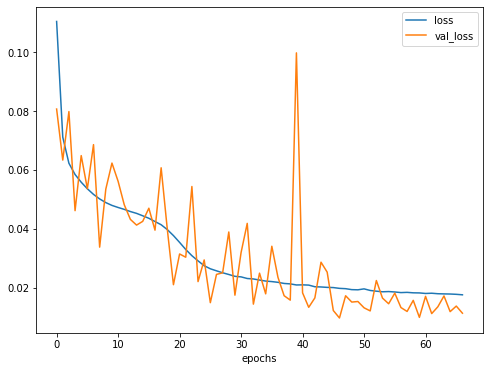

In [22]:
# from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train, 
                    epochs=200, batch_size=64, validation_split=0.2, callbacks=[callback])
### check the loss trend of epochs
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))

import matplotlib.pyplot as plt
plt.show()

In [23]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

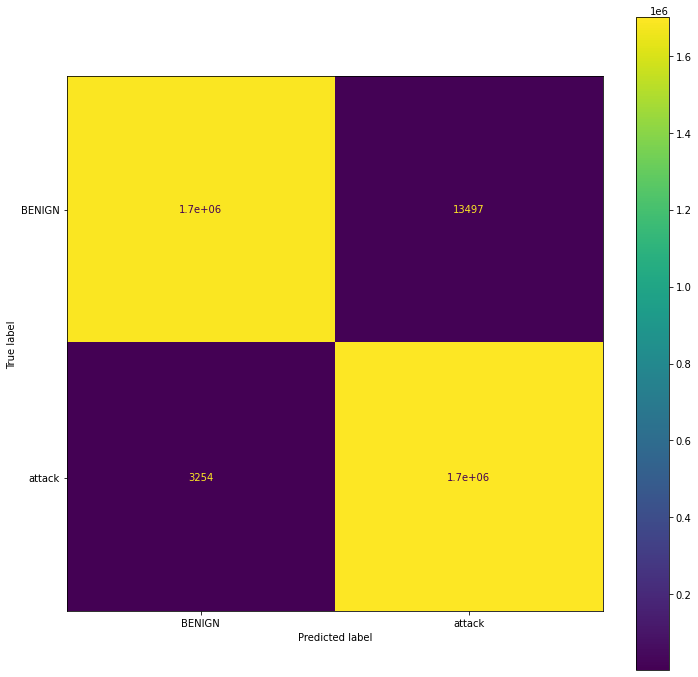

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

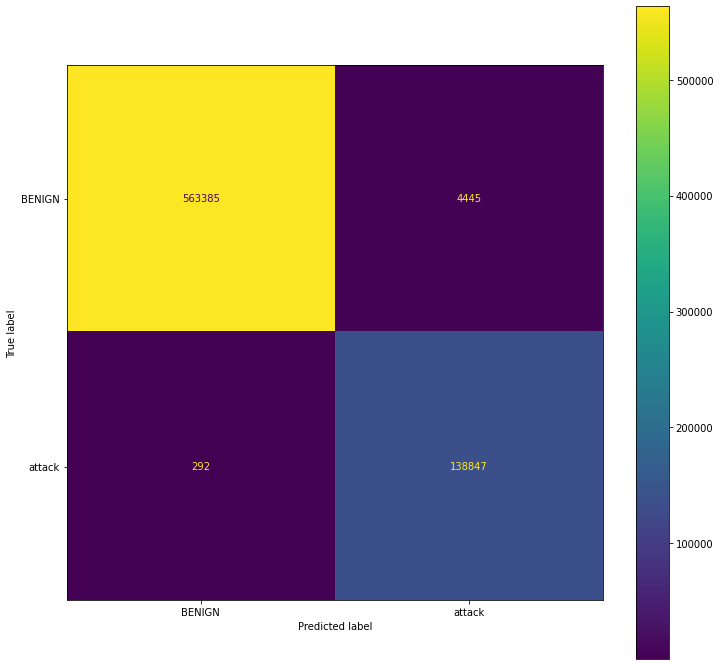

In [25]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [26]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [28]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00   1703490
      attack       0.99      1.00      1.00   1703490

    accuracy                           1.00   3406980
   macro avg       1.00      1.00      1.00   3406980
weighted avg       1.00      1.00      1.00   3406980



,accuracy,precision,recall,f1_score
BENIGN,0.9951,0.9921,0.9981,0.9951
attack,0.9951,0.9981,0.9921,0.9951


In [29]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00    567830
      attack       0.97      1.00      0.98    139139

    accuracy                           0.99    706969
   macro avg       0.98      1.00      0.99    706969
weighted avg       0.99      0.99      0.99    706969



In [30]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
BENIGN,0.9933,0.9995,0.9922,0.9958
attack,0.9933,0.969,0.9979,0.9832


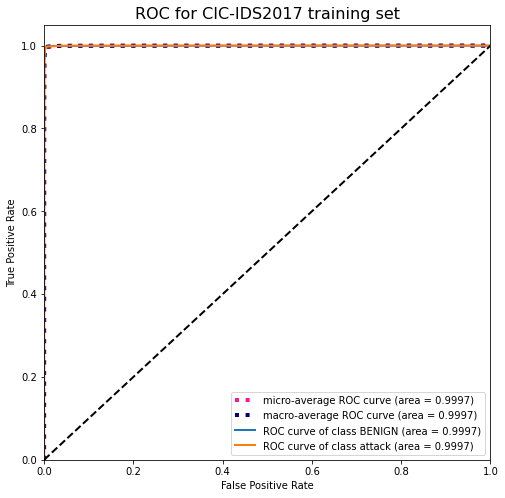

In [31]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for CIC-IDS2017 training set')

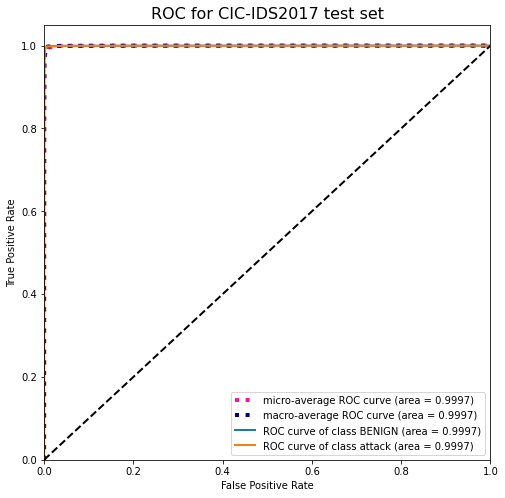

In [32]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for CIC-IDS2017 test set')